In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rc('figure', figsize=(18, 3))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20

## Загружаем данные

In [3]:
df_total = pd.read_csv('df_total.csv', index_col = 'Дата', parse_dates = True)

In [4]:
df_total.describe()

,Час,"План ГЭС, МВт*ч","План АЭС, МВт*ч","План ТЭС, МВт*ч","ТЭС мин, МВт*ч","ТЭС макс, МВт*ч","Потребление, МВт*ч","Экспорт, МВт*ч","Импорт, МВт*ч","План СЭС, МВт*ч","План ВЭС, МВт*ч","План ВИЭ, МВт*ч","Ценопринимающее предложение, МВт*ч","Ценопринимание сверх минимальной мощности, МВт*ч","Цена продажи, руб./МВт*ч"
count,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00,348120.00
mean,11.50,534.58,1560.42,3913.61,3025.44,4477.10,5747.53,1515.23,1427.52,9.41,2.60,0.00,82868.08,5942.29,1210.50
std,6.92,589.85,2864.37,4614.16,3473.18,5119.15,5490.54,1575.23,1613.50,33.02,11.77,0.00,9449.68,1913.18,334.55
min,0.00,0.00,0.00,0.00,0.00,0.00,272.74,0.00,0.00,0.00,0.00,0.00,60738.47,549.59,0.00
25%,5.75,0.00,0.00,460.00,316.80,529.50,1339.95,357.36,148.65,0.00,0.00,0.00,75799.48,4499.91,950.26
50%,11.50,420.04,0.00,1985.30,1746.05,2561.48,3887.48,1076.28,765.58,0.00,0.00,0.00,81738.27,6171.88,1198.06
75%,17.25,803.40,2560.00,5665.56,4715.00,6925.67,8664.96,2203.08,2148.79,0.00,0.00,0.00,90519.40,7489.64,1447.87
max,23.00,2840.00,14296.30,19972.01,15233.22,21662.43,22276.40,8633.12,7994.18,309.69,308.18,0.00,105886.44,10423.56,6119.06


In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348120 entries, 2018-01-01 to 2020-08-24
Data columns (total 17 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   ЦЗ                                                348120 non-null  object 
 1   ЗСП                                               348120 non-null  object 
 2   Час                                               348120 non-null  int64  
 3   План ГЭС, МВт*ч                                   348120 non-null  float64
 4   План АЭС, МВт*ч                                   348120 non-null  float64
 5   План ТЭС, МВт*ч                                   348120 non-null  float64
 6   ТЭС мин, МВт*ч                                    348120 non-null  float64
 7   ТЭС макс, МВт*ч                                   348120 non-null  float64
 8   Потребление, МВт*ч                                348120 non-null  f

### Проверяем на пропуски

In [6]:
df_total.isna().sum().sort_values(ascending=False)

ЦЗ                                                  0
Экспорт, МВт*ч                                      0
Ценопринимание сверх минимальной мощности, МВт*ч    0
Ценопринимающее предложение, МВт*ч                  0
План ВИЭ, МВт*ч                                     0
План ВЭС, МВт*ч                                     0
План СЭС, МВт*ч                                     0
Импорт, МВт*ч                                       0
Потребление, МВт*ч                                  0
ЗСП                                                 0
ТЭС макс, МВт*ч                                     0
ТЭС мин, МВт*ч                                      0
План ТЭС, МВт*ч                                     0
План АЭС, МВт*ч                                     0
План ГЭС, МВт*ч                                     0
Час                                                 0
Цена продажи, руб./МВт*ч                            0
dtype: int64

### Пропуски отсутcтвуют

## Общие данные

In [7]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348120 entries, 2018-01-01 to 2020-08-24
Data columns (total 17 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   ЦЗ                                                348120 non-null  object 
 1   ЗСП                                               348120 non-null  object 
 2   Час                                               348120 non-null  int64  
 3   План ГЭС, МВт*ч                                   348120 non-null  float64
 4   План АЭС, МВт*ч                                   348120 non-null  float64
 5   План ТЭС, МВт*ч                                   348120 non-null  float64
 6   ТЭС мин, МВт*ч                                    348120 non-null  float64
 7   ТЭС макс, МВт*ч                                   348120 non-null  float64
 8   Потребление, МВт*ч                                348120 non-null  f

## Проверим на выбросы

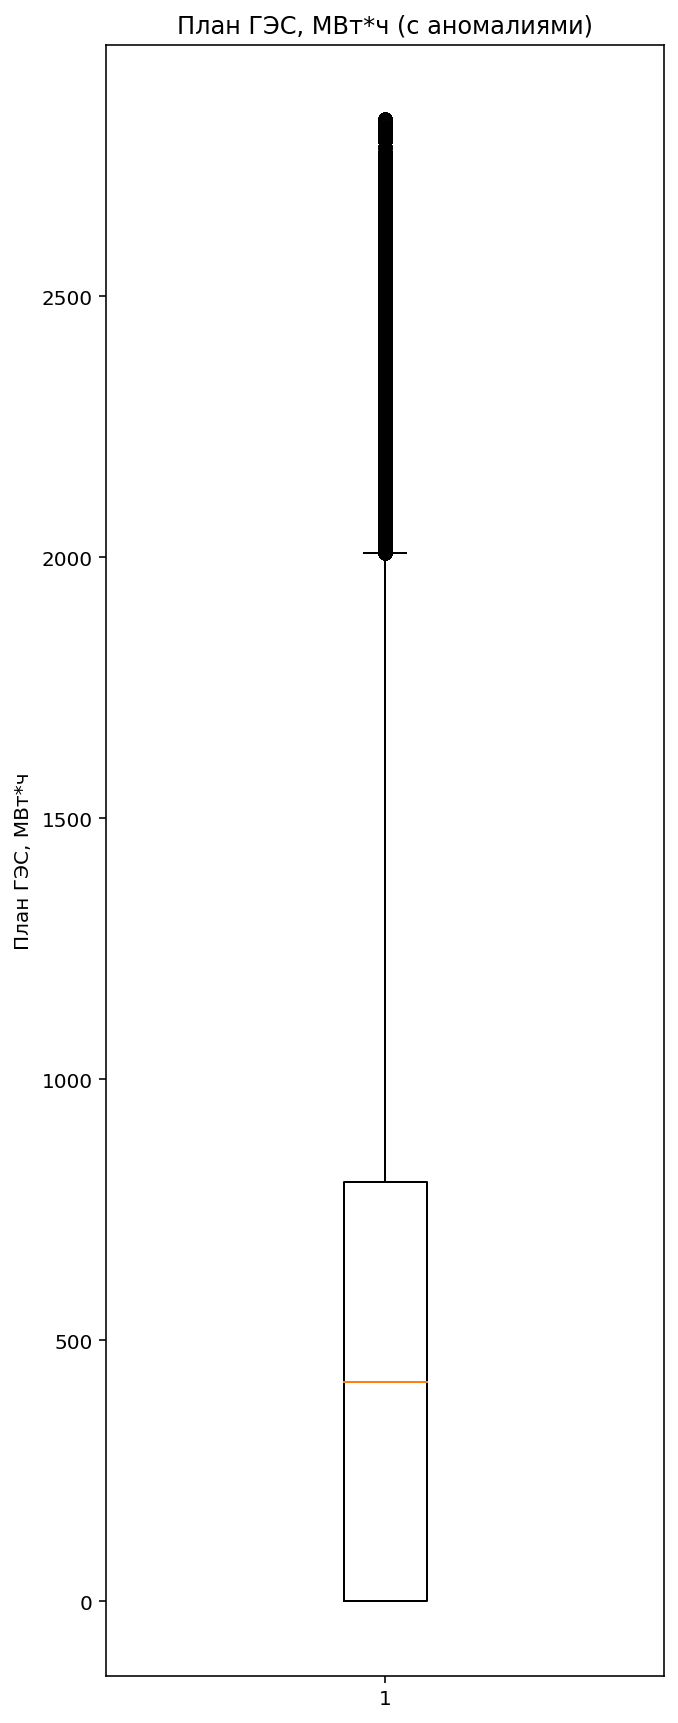

In [8]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df_total["План ГЭС, МВт*ч"])
ax.set_ylabel('План ГЭС, МВт*ч')
ax.set_title('План ГЭС, МВт*ч (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [9]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries
boundaries = calculate_outliers(df_total["План ГЭС, МВт*ч"])
boundaries

(-1205.092875, 2008.488125)

In [10]:
is_outlier = (df_total["План ГЭС, МВт*ч"] < boundaries[0]) | (df_total["План ГЭС, МВт*ч"] > boundaries[1]) 
is_outlier.sum()

14632

## Видим в столбце "План ГЭС, МВт*ч" 14632 выброса. Не буду их приводить к рассчитанной верхней границы 2008.488125. Аналогично необходимо сделать по всем столбцам, чтобы не захламлять ноутбук  и так как нет возможности более детально узнать по признакам, пока это делать не буду

In [11]:
df_total

,ЦЗ,ЗСП,Час,"План ГЭС, МВт*ч","План АЭС, МВт*ч","План ТЭС, МВт*ч","ТЭС мин, МВт*ч","ТЭС макс, МВт*ч","Потребление, МВт*ч","Экспорт, МВт*ч","Импорт, МВт*ч","План СЭС, МВт*ч","План ВЭС, МВт*ч","План ВИЭ, МВт*ч","Ценопринимающее предложение, МВт*ч","Ценопринимание сверх минимальной мощности, МВт*ч","Цена продажи, руб./МВт*ч"
Дата,,,,,,,,,,,,,,,,,
2018-01-01,Европа,FZUROE07,8,145.60,616.00,15310.12,12985.70,18417.56,16133.17,1724.10,2122.27,8.30,0.00,0,82858.55,6103.48,776.25
2018-01-01,Европа,FZURTU08,8,0.00,0.00,11906.50,8014.69,12166.20,9971.93,1658.87,29.77,0.00,0.00,0,82858.55,6103.48,685.40
2018-01-01,Европа,FZVLBS15,8,120.00,4073.00,576.00,576.00,640.00,1375.47,3260.66,1.12,0.60,0.00,0,82858.55,6103.48,781.87
2018-01-01,Европа,FZVLOE13,8,500.00,49.50,3857.36,3777.73,4461.39,5812.80,1369.47,2873.54,0.00,3.50,0,82858.55,6103.48,823.30
2018-01-01,Европа,FZYUAS18,8,0.00,0.00,431.50,326.30,531.50,532.28,30.33,154.76,2.00,0.00,0,82858.55,6103.48,890.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,Европа,FZYUKU20,23,6.20,4127.00,3009.95,2776.95,4084.74,5558.01,1812.19,364.92,0.00,105.30,0,69677.56,2497.43,1028.61
2020-08-24,Европа,FZYUOE16,23,322.79,0.00,654.60,554.69,1171.70,1652.50,214.47,949.98,0.00,0.00,0,69677.56,2497.43,1033.10
2020-08-24,Европа,FZYUVG17,23,1120.00,0.00,297.00,297.00,393.00,1411.46,848.52,899.93,0.00,0.00,0,69677.56,2497.43,1031.76


## Обучение модели ARIMA

## Сгруппируем данные по дням

In [12]:
serie = df_total.groupby(df_total.index)["Цена продажи, руб./МВт*ч"].agg(['mean'])
serie

,mean
Дата,
2018-01-01,1011.11
2018-01-02,1151.51
2018-01-03,1220.93
2018-01-04,1274.93
2018-01-05,1221.15
...,...
2020-08-20,1280.27
2020-08-21,1255.15
2020-08-22,1200.06


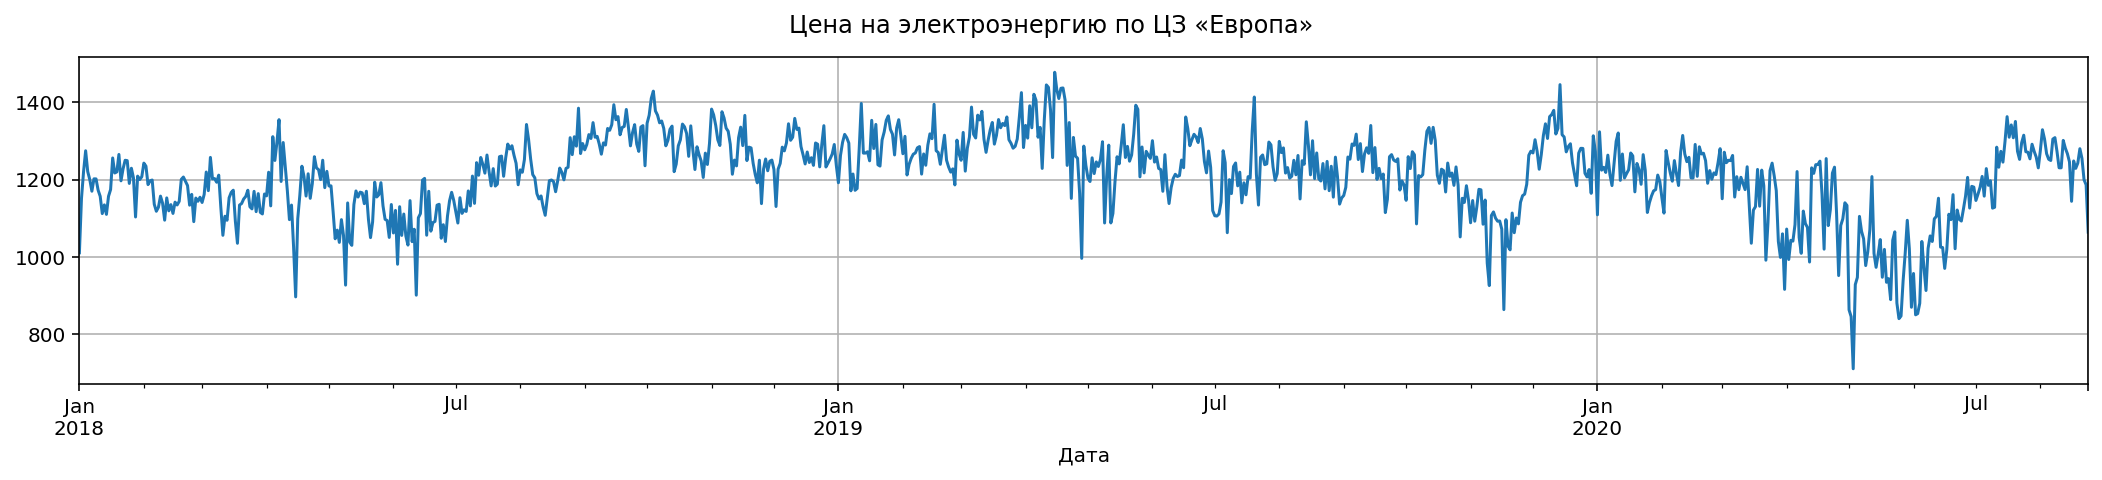

In [13]:
fig = plt.figure()
fig.suptitle('Цена на электроэнергию по ЦЗ «Европа»')
serie["mean"].plot()
plt.grid()
plt.show()

## Видим отсутствие тренда

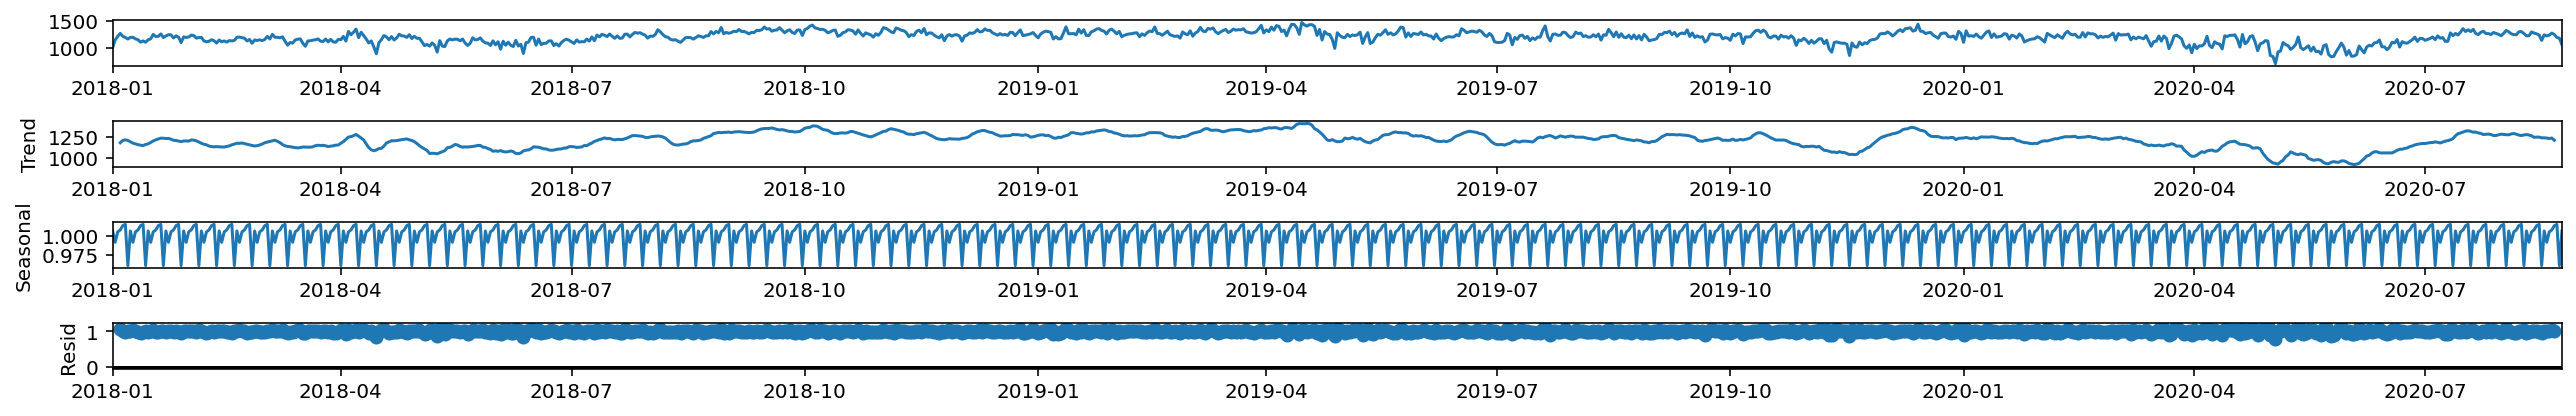

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(serie, model = 'multiplicative')
result.plot();

## Построим график автокорреляционной функции

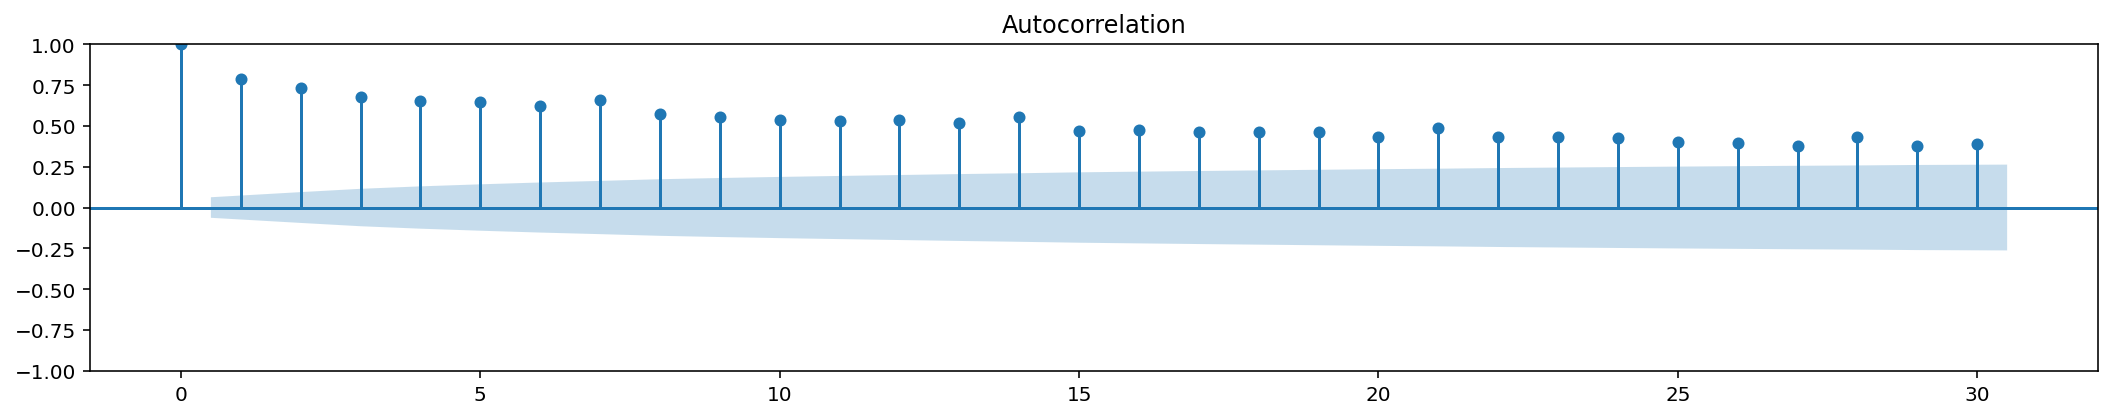

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(serie);

## Каждый седьмой месяц больше соседних (значение 7, 14, 21, 28)

### Для оценки стационарности примениv тест Дики-Фуллера (Dickey-Fuller test). Нулевая гипотеза предполагает, что процесс нестационарный. Альтернативная гипотеза соответственно говорит об обратном. Применим этот тест. Используем пороговое значение, равное 0,05 (5%).

In [16]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(serie)
print("Статистика ADF: %f" % res[0])
print("p-значение: %f" % res[1])
print("Критические значения:")
for key, value in res[4].items():
    print("\t%s: %.3f" % (key, value))

Статистика ADF: -2.884673
p-значение: 0.047160
Критические значения:
	1%: -3.437
	5%: -2.865
	10%: -2.568


## Результат меньше 5%. Временной ряд стационарен.

In [17]:
train = serie[:'2020-07-25']
test = serie['2020-07-26':]            

In [18]:
print(len(train), len(test))

937 30


# обучим Arima model

In [19]:
count = 0
total = 50
for i in range(1, 40):
    model = ARIMA(train, order=(0, 0, i))
    model_fit = model.fit()
    predictions = model_fit.predict(
            start=len(train), end=len(train)+len(test)-1, dynamic=False)
    rmse = np.sqrt(
            mean_squared_error(test, predictions))
    print('\nRMSE на тестовой выборке: %.3f' % rmse)
    if rmse < total:
        total = rmse
        count = i
print(f'Лучшая точность {rmse} при количестве периодов {count}')


RMSE на тестовой выборке: 66.386

RMSE на тестовой выборке: 66.289

RMSE на тестовой выборке: 65.657

RMSE на тестовой выборке: 64.755

RMSE на тестовой выборке: 64.426

RMSE на тестовой выборке: 64.762

RMSE на тестовой выборке: 63.441

RMSE на тестовой выборке: 62.740

RMSE на тестовой выборке: 62.421

RMSE на тестовой выборке: 62.194

RMSE на тестовой выборке: 62.208

RMSE на тестовой выборке: 62.674

RMSE на тестовой выборке: 62.711

RMSE на тестовой выборке: 63.760

RMSE на тестовой выборке: 63.187

RMSE на тестовой выборке: 62.470

RMSE на тестовой выборке: 62.535

RMSE на тестовой выборке: 61.503

RMSE на тестовой выборке: 60.544

RMSE на тестовой выборке: 61.756

RMSE на тестовой выборке: 59.430

RMSE на тестовой выборке: 58.450

RMSE на тестовой выборке: 58.094

RMSE на тестовой выборке: 55.114

RMSE на тестовой выборке: 54.159

RMSE на тестовой выборке: 53.215

RMSE на тестовой выборке: 55.172

RMSE на тестовой выборке: 51.964

RMSE на тестовой выборке: 52.785

RMSE на тесто

In [20]:
model = ARIMA(train, order=(0, 0, 40))
model_fit = model.fit()
predictions = model_fit.predict(
        start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = np.sqrt(
        mean_squared_error(test, predictions))

print('\nRMSE на тестовой выборке: %.3f' % rmse)


RMSE на тестовой выборке: 47.026


In [21]:
model = ARIMA(train, order=(0, 0, 41))
model_fit = model.fit()
predictions = model_fit.predict(
        start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = np.sqrt(
        mean_squared_error(test, predictions))

print('\nRMSE на тестовой выборке: %.3f' % rmse)


RMSE на тестовой выборке: 47.425


# обучим лучшую ARIMA модель

In [25]:
model = ARIMA(train, order=(0, 0, 40))
model_fit = model.fit()

In [26]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start, end)
predictions

2020-07-26   1253.36
2020-07-27   1285.70
2020-07-28   1256.09
2020-07-29   1270.23
2020-07-30   1267.18
               ...  
2020-08-20   1242.86
2020-08-21   1247.02
2020-08-22   1227.49
2020-08-23   1221.72
2020-08-24   1221.57
Freq: D, Name: predicted_mean, Length: 30, dtype: float64

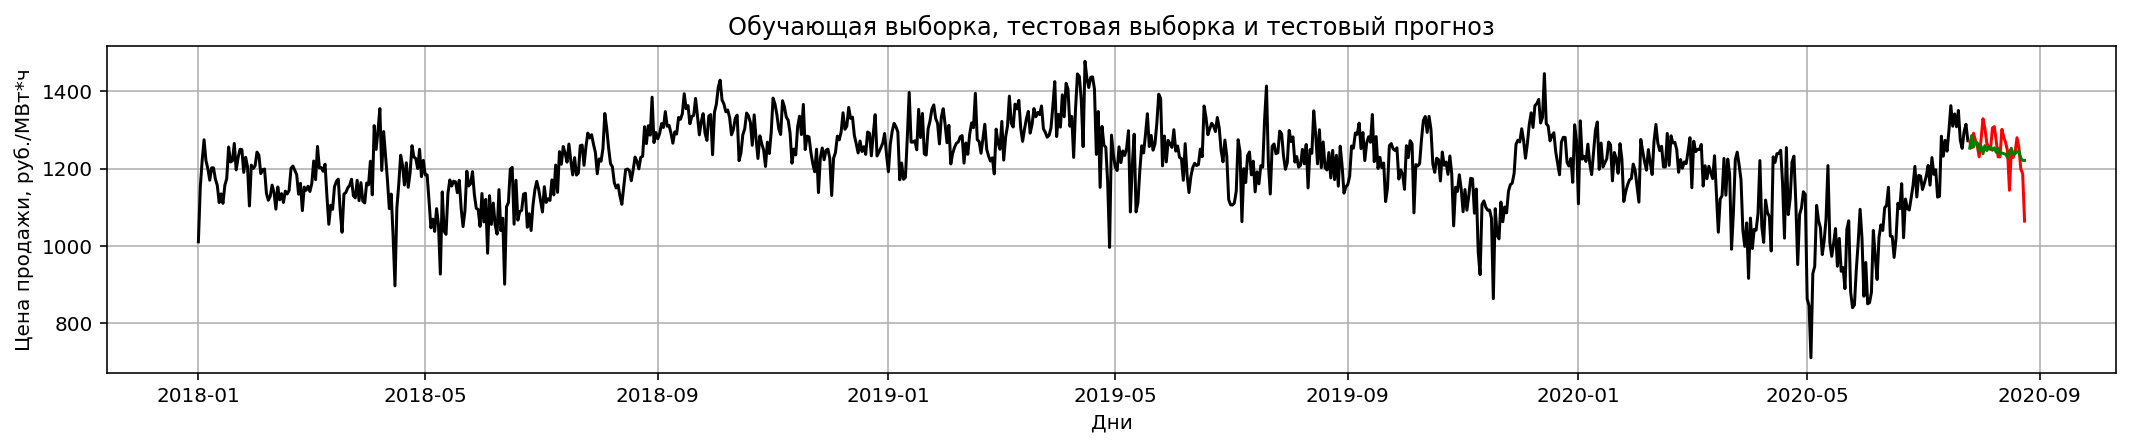

In [27]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Цена продажи, руб./МВт*ч')
plt.xlabel('Дни')
plt.grid()
plt.show()

### Сделаем прогноз на месяц вперед:

In [29]:
start = len(serie)
end = len(serie) - 1 + 30
forecast = model_fit.predict(start, end)
forecast

2020-08-25   1215.63
2020-08-26   1205.24
2020-08-27   1200.71
2020-08-28   1208.88
2020-08-29   1206.02
               ...  
2020-09-19   1209.17
2020-09-20   1209.17
2020-09-21   1209.17
2020-09-22   1209.17
2020-09-23   1209.17
Freq: D, Name: predicted_mean, Length: 30, dtype: float64

In [30]:
forecast.values

array([1215.62769799, 1205.24179021, 1200.71205184, 1208.87511036,
       1206.01931416, 1202.64511031, 1202.74356931, 1209.69140749,
       1206.26746111, 1207.41746886, 1209.17095727, 1209.17095727,
       1209.17095727, 1209.17095727, 1209.17095727, 1209.17095727,
       1209.17095727, 1209.17095727, 1209.17095727, 1209.17095727,
       1209.17095727, 1209.17095727, 1209.17095727, 1209.17095727,
       1209.17095727, 1209.17095727, 1209.17095727, 1209.17095727,
       1209.17095727, 1209.17095727])

## Очень много одинаковых значений, так быть не должно

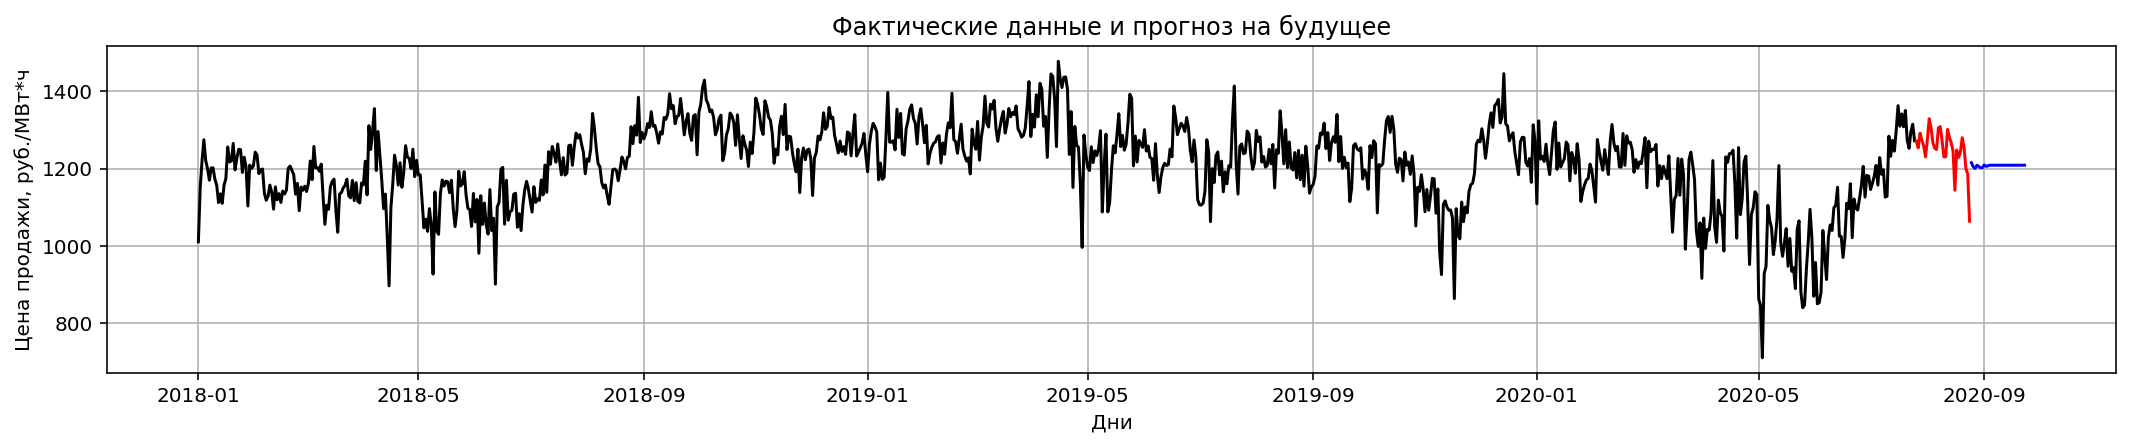

In [31]:
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(forecast, color = 'blue')
 
# заголовок и подписи к осям
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Цена продажи, руб./МВт*ч')
plt.xlabel('Дни')
 
# добавим сетку
plt.grid()
 
plt.show()

## Попробуем Sarimax

In [73]:
from pmdarima import auto_arima

parameter_search = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)           #
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11170.505, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10581.734, Time=1.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10671.384, Time=1.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11168.752, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=10783.084, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=10537.969, Time=2.79 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=11003.863, Time=3.17 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=10479.291, Time=3.85 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=10550.324, Time=1.45 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.57 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept 

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, 
                order = (3, 0, 1), 
                seasonal_order = (2, 1, 0, 12))
result = model.fit()

In [80]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end)
predictions

2020-07-26   1287.62
2020-07-27   1263.07
2020-07-28   1318.55
2020-07-29   1267.68
2020-07-30   1295.91
               ...  
2020-08-20   1288.82
2020-08-21   1343.07
2020-08-22   1289.64
2020-08-23   1322.57
2020-08-24   1291.51
Freq: D, Name: predicted_mean, Length: 30, dtype: float64

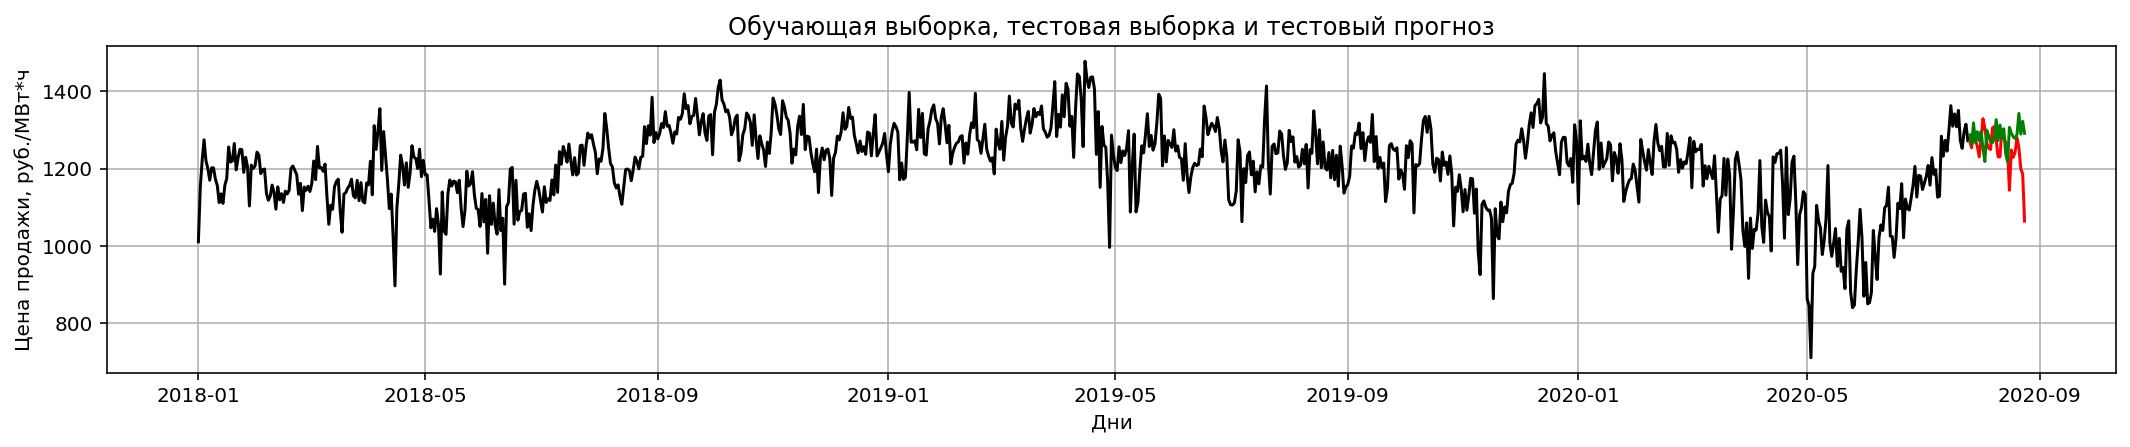

In [81]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Цена продажи, руб./МВт*ч')
plt.xlabel('Дни')
 
# добавим сетку
plt.grid()
 
plt.show()

In [82]:
print(np.sqrt(mean_squared_error(test, predictions)))

71.86503762360388


In [84]:
start = len(x)
end = len(x) - 1 + 30
forecast = result.predict(start, end)
forecast

2020-08-25   1320.56
2020-08-26   1259.35
2020-08-27   1233.35
2020-08-28   1305.60
2020-08-29   1300.38
               ...  
2020-09-19   1251.48
2020-09-20   1226.65
2020-09-21   1306.57
2020-09-22   1296.10
2020-09-23   1280.40
Freq: D, Name: predicted_mean, Length: 30, dtype: float64

## Прогноз на 30 дней

In [90]:
forecast.values

array([1320.56328515, 1259.34894092, 1233.35354037, 1305.59564172,
       1300.38010306, 1278.97540296, 1280.61170748, 1281.04447916,
       1333.1855121 , 1280.08007472, 1313.78699669, 1283.55230292,
       1309.48716027, 1252.5065157 , 1225.61671841, 1305.78690975,
       1294.34019704, 1278.748993  , 1277.01371824, 1284.1329094 ,
       1335.60886463, 1282.06136107, 1317.26307731, 1285.43937558,
       1312.04190552, 1251.47610404, 1226.65215845, 1306.57452375,
       1296.1002155 , 1280.39576071])

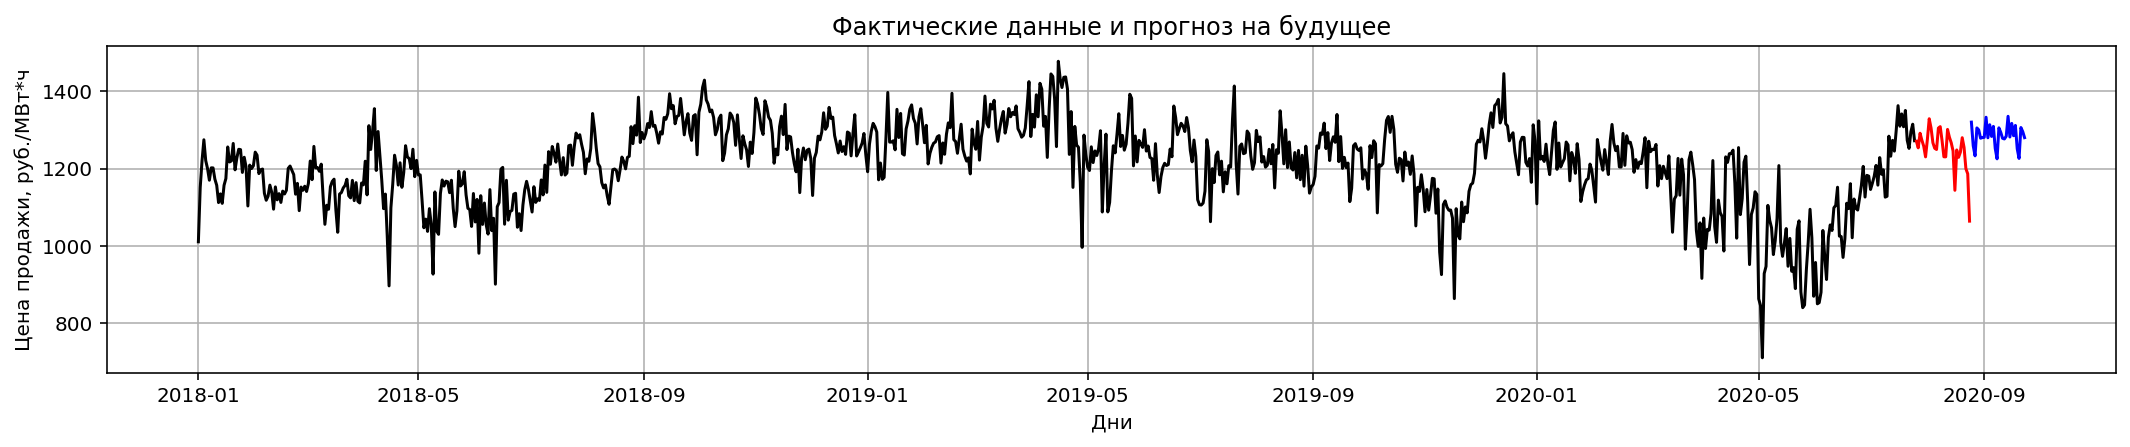

In [85]:
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(forecast, color = 'blue')
 
# заголовок и подписи к осям
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Цена продажи, руб./МВт*ч')
plt.xlabel('Дни')
 
# добавим сетку
plt.grid()
 
plt.show()

## Несмотря на то, что точность ниже чем у ARIMA, данные больше похожи на правду, остановимся на них

## LTSM

In [42]:
datapred=serie
datapred.head(3)

,mean
Дата,
2018-01-01,1011.11
2018-01-02,1151.51
2018-01-03,1220.93


In [46]:
train_data = train
test_data = test

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaled_train_data=scaler.fit_transform(train_data)
scaled_test_data=scaler.transform(test_data)

In [49]:
length=30
batch_size=1
features=scaled_train_data.shape[1]

In [50]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

time_series_generator=TimeseriesGenerator(scaled_train_data,scaled_train_data,length=length,batch_size=batch_size)
X,y = time_series_generator[0]


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers

In [52]:
import tensorflow as tf
initializer = tf.keras.initializers.he_uniform(seed=0)

model = Sequential()

model.add(LSTM(51, activation='relu', input_shape=(length,features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))

model.add(Dense(features,activation='sigmoid',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))

opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

In [53]:
model.fit_generator(time_series_generator,epochs=300)

Epoch 1/300
907/907 [==============================] - 11s 9ms/step - loss: 0.0096
Epoch 2/300
907/907 [==============================] - 9s 9ms/step - loss: 0.0071
Epoch 3/300
907/907 [==============================] - 8s 9ms/step - loss: 0.0068
Epoch 4/300
907/907 [==============================] - 9s 10ms/step - loss: 0.0071
Epoch 5/300
907/907 [==============================] - 8s 9ms/step - loss: 0.0067
Epoch 6/300
907/907 [==============================] - 8s 9ms/step - loss: 0.0067
Epoch 7/300
907/907 [==============================] - 8s 9ms/step - loss: 0.0066
Epoch 8/300
907/907 [==============================] - 8s 9ms/step - loss: 0.0066
Epoch 9/300
907/907 [==============================] - 8s 8ms/step - loss: 0.0067
Epoch 10/300
907/907 [==============================] - 8s 9ms/step - loss: 0.0065
Epoch 11/300
907/907 [==============================] - 8s 8ms/step - loss: 0.0066
Epoch 12/300
907/907 [==============================] - 8s 9ms/step - loss: 0.0065
Epoch 13/30

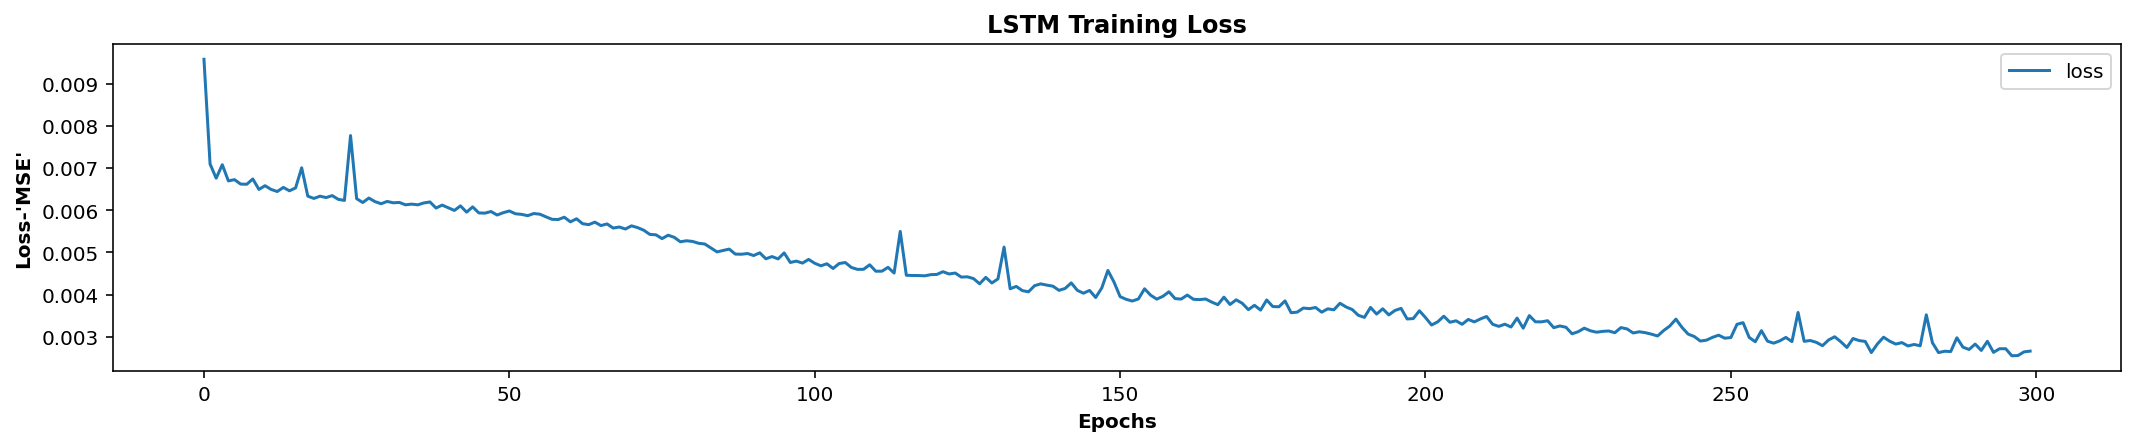

In [54]:
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [55]:
n_features = scaled_train_data.shape[1]
test_outputs = []
batch = scaled_train_data[-length:].reshape((1, length, n_features))

for i in range(len(test_data)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)
true_outputs = scaler.inverse_transform(test_outputs)
true_outputs = pd.DataFrame(data=true_outputs,columns=test_data.columns,index=test_data.index)


1/1 [==============================] - 0s 23ms/step


In [57]:
rmse_a=np.sqrt(mean_squared_error(test_data['mean'],true_outputs['mean']))
rmse_a=rmse_a.round(2)
print('Price RMSE: ', rmse_a)

Global Active Power RMSE:  66.75
